<a href="https://colab.research.google.com/github/naruivo/home/blob/master/depression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/naruivo/Depression/main/Depression.csv?token=GHSAT0AAAAAABULM5ZIU54SAII2A7AZDKD6YUC7DKQ")

In [8]:
df

,id,simplicity,fatalism,depression,adjsimp,adjfatal,adjdep
0,1,0.92983,0.35589,0.59870,0.75934,0.10673,0.41865
1,2,0.91097,1.18439,0.72787,0.72717,0.99915,0.51688
2,3,0.53366,-0.05837,0.53411,0.62176,0.03811,0.70699
3,4,0.74118,0.35589,0.56641,0.83522,0.42218,0.65639
4,5,0.53366,0.77014,0.50182,0.47697,0.81423,0.53518
...,...,...,...,...,...,...,...
77,78,1.04302,1.80577,1.47061,0.72117,1.50039,1.14913
78,79,1.79763,2.22003,1.40603,1.59752,2.05016,1.16443
79,80,2.11834,0.77014,2.01960,2.39515,0.88910,2.24452
80,81,1.42033,1.18439,1.47061,1.31493,1.04058,1.37153


In [9]:
# Numerical libraries
import numpy as np   

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

from sklearn import metrics

import pandas as pd

from sklearn.metrics import silhouette_samples, silhouette_score
from mpl_toolkits.mplot3d import Axes3D

In [10]:
df.drop('id', axis=1, inplace=True)

In [12]:
df.describe()

,simplicity,fatalism,depression,adjsimp,adjfatal,adjdep
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000
mean,1.000000,1.000000,1.000001,1.000000,1.000000,1.000000
std,0.500000,0.500001,0.500000,0.499999,0.500000,0.500000
min,0.250680,-0.058370,0.469530,0.235690,0.030120,0.234540
25%,0.656282,0.563010,0.566410,0.697958,0.731598,0.596565
50%,0.882665,0.977270,0.824750,0.968490,0.924290,0.967845
75%,1.269400,1.391520,1.373730,1.201790,1.299120,1.261750
max,2.854080,2.220030,2.245650,2.949770,2.249310,2.787630


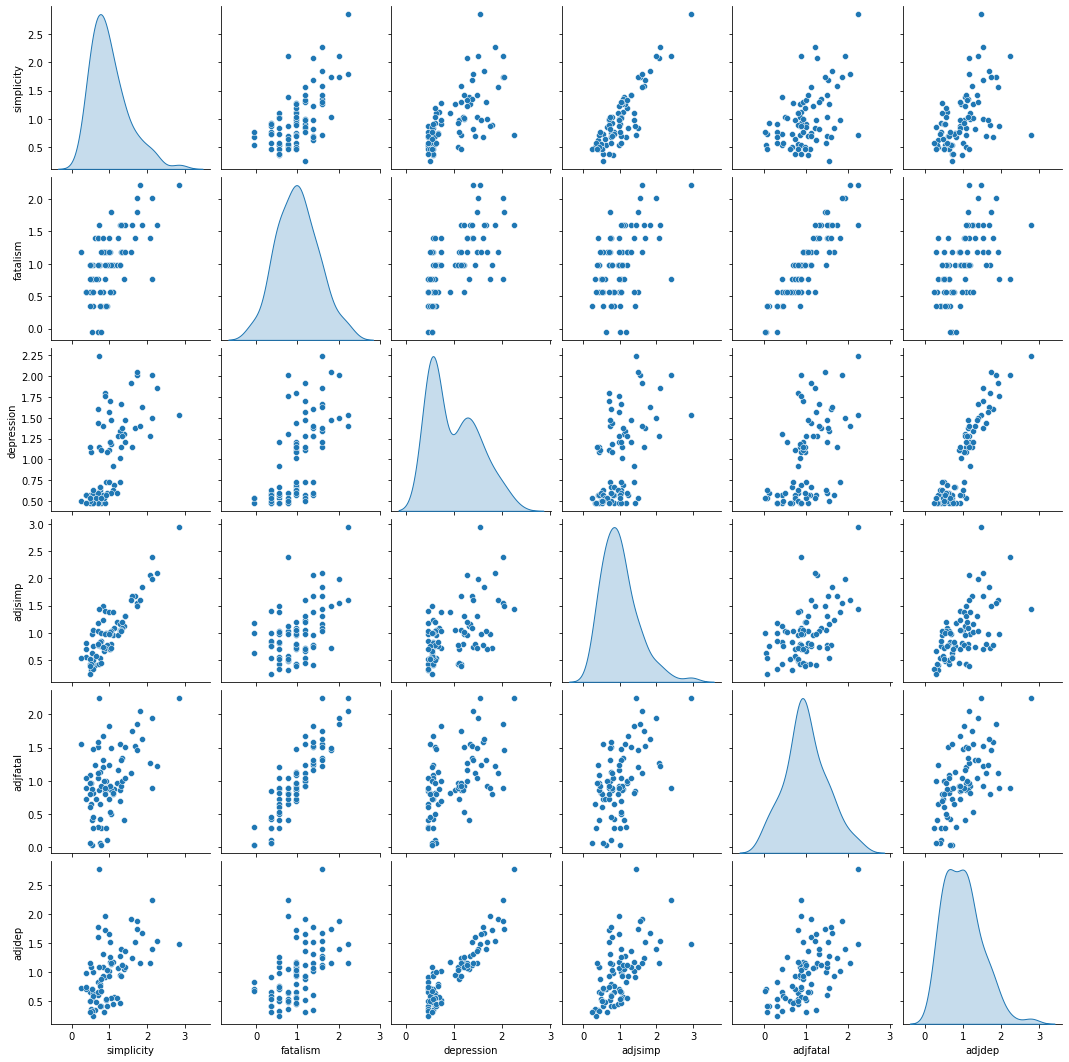

In [14]:
import seaborn as sns
sns.pairplot(df, diag_kind='kde') 

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

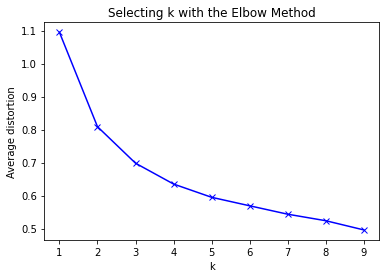

In [16]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df)
    prediction=model.predict(df)
    meanDistortions.append(sum(np.min(cdist(df, model.cluster_centers_, 'euclidean'), axis=1)) / df
                           .shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [27]:
kmeans = KMeans(n_clusters=2, n_init = 15, random_state=2345)
df["Cluster"] = kmeans.fit_predict(mydata_z)
df["Cluster"] = df["Cluster"].astype("category")

In [28]:
df['Cluster'].value_counts()

1    53
0    29
Name: Cluster, dtype: int64

In [29]:
df

,simplicity,fatalism,depression,adjsimp,adjfatal,adjdep,Cluster
0,0.92983,0.35589,0.59870,0.75934,0.10673,0.41865,1
1,0.91097,1.18439,0.72787,0.72717,0.99915,0.51688,1
2,0.53366,-0.05837,0.53411,0.62176,0.03811,0.70699,1
3,0.74118,0.35589,0.56641,0.83522,0.42218,0.65639,1
4,0.53366,0.77014,0.50182,0.47697,0.81423,0.53518,1
...,...,...,...,...,...,...,...
77,1.04302,1.80577,1.47061,0.72117,1.50039,1.14913,0
78,1.79763,2.22003,1.40603,1.59752,2.05016,1.16443,0
79,2.11834,0.77014,2.01960,2.39515,0.88910,2.24452,0
80,1.42033,1.18439,1.47061,1.31493,1.04058,1.37153,0


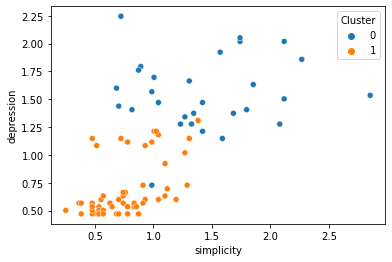

In [30]:
sns.scatterplot(
    x='simplicity', y="depression", hue="Cluster", data=df
);

In [32]:
from scipy.stats import zscore

mydata_z = df.apply(zscore)

In [33]:
mydata_z

,simplicity,fatalism,depression,adjsimp,adjfatal,adjdep,Cluster
0,-0.141205,-1.296147,-0.807541,-0.484282,-1.797534,-1.169856,0.739709
1,-0.179157,0.371048,-0.547611,-0.549018,-0.001710,-0.972187,0.739709
2,-0.938421,-2.129764,-0.937516,-0.761136,-1.935619,-0.589627,0.739709
3,-0.520827,-1.296147,-0.872518,-0.331588,-1.162751,-0.691450,0.739709
4,-0.938421,-0.462549,-1.002493,-1.052499,-0.373826,-0.935361,0.739709
...,...,...,...,...,...,...,...
77,0.086569,1.621454,0.947011,-0.561092,1.006939,0.300095,-1.351882
78,1.605076,2.455072,0.817056,1.202396,2.113246,0.330884,-1.351882
79,2.250443,-0.462549,2.051748,2.807475,-0.223164,2.504358,-1.351882
80,0.845832,0.371048,0.947011,0.633737,0.081660,0.747633,-1.351882


In [34]:
df

,simplicity,fatalism,depression,adjsimp,adjfatal,adjdep,Cluster
0,0.92983,0.35589,0.59870,0.75934,0.10673,0.41865,1
1,0.91097,1.18439,0.72787,0.72717,0.99915,0.51688,1
2,0.53366,-0.05837,0.53411,0.62176,0.03811,0.70699,1
3,0.74118,0.35589,0.56641,0.83522,0.42218,0.65639,1
4,0.53366,0.77014,0.50182,0.47697,0.81423,0.53518,1
...,...,...,...,...,...,...,...
77,1.04302,1.80577,1.47061,0.72117,1.50039,1.14913,0
78,1.79763,2.22003,1.40603,1.59752,2.05016,1.16443,0
79,2.11834,0.77014,2.01960,2.39515,0.88910,2.24452,0
80,1.42033,1.18439,1.47061,1.31493,1.04058,1.37153,0
